K Means 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

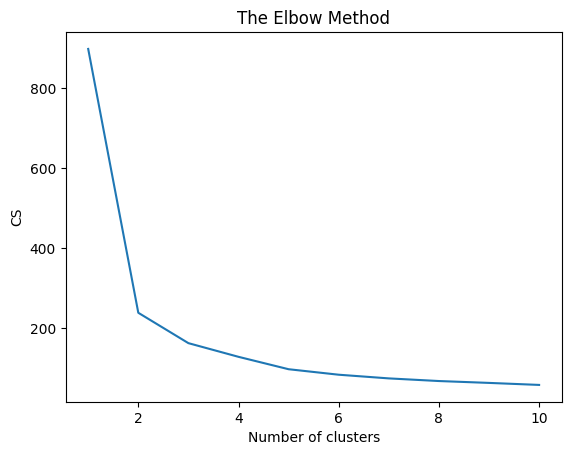

Prediction with k=3
Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58
Prediction with k=4
Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

data = pd.read_csv("input\Live.csv")

data.info()
data.shape
data.head()

data.isnull().sum()
data.drop(['Column1' , 'Column2' , 'Column3' , 'Column4'] , axis=1 , inplace=True)

data.info()
data.describe()

data['status_id'].unique()
len(data['status_id'].unique())

data['status_published'].unique()
len(data['status_published'].unique())

data['status_type'].unique()
len(data['status_type'].unique())

data.drop(['status_id' , 'status_published'] , axis=1 , inplace=True)

data.info()
data.head()

X = data
y = data['status_type']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

X.info()
X.head()

cols = X.columns 

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X , columns=cols)
X.head()

print("Prediction with k = 2")
from sklearn.cluster import KMeans
kmeans = KMeans( n_clusters=2 , random_state=0)
kmeans.fit(X)

kmeans.cluster_centers_
kmeans.inertia_

labels = kmeans.labels_
correct_labels = sum( y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

print("Prediction with k=3")
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

print("Prediction with k=4")
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))